In [20]:
import os
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

from options.test_options import TestOptions
from models import create_model
from data.base_dataset import get_transform

# -------------------- CONFIGURATION --------------------
test_image_paths = [
    "./datasets/selfie2anime/testA/ankita.jpg",
    "./datasets/selfie2anime/testA/ankita2.jpg"
]





initialize network with normal
initialize network with normal
model [AttentionGANModel] was created
loading the model from ./checkpoints\selfie2anime_pretrained\latest_net_G_A.pth
loading the model from ./checkpoints\selfie2anime_pretrained\latest_net_G_B.pth
---------- Networks initialized -------------
[Network G_A] Total number of parameters : 11.832 M
[Network G_B] Total number of parameters : 11.832 M
-----------------------------------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


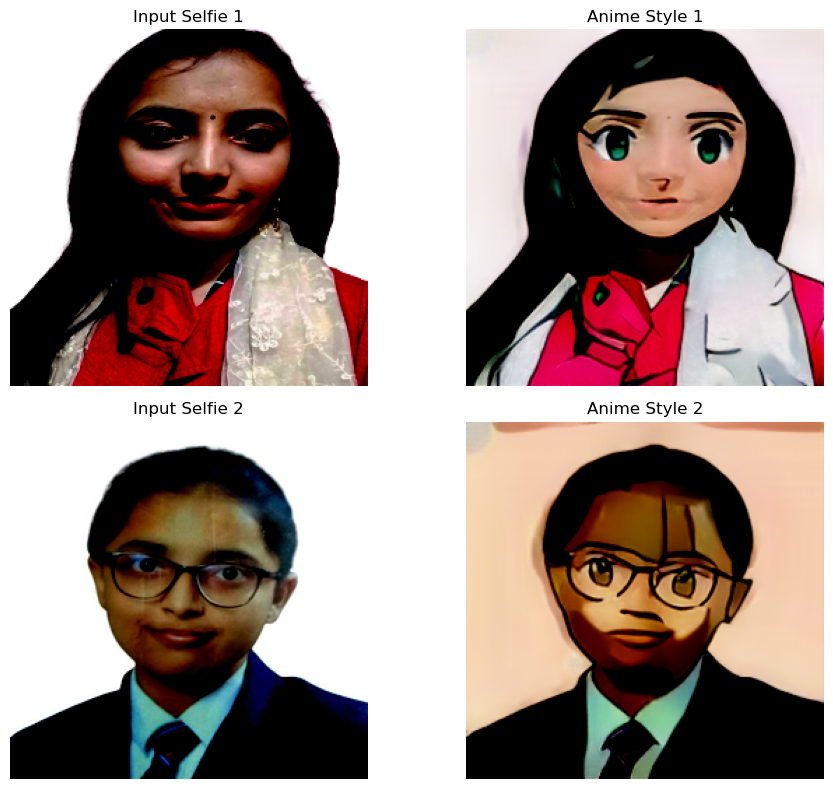

In [21]:
import os
import torch
from PIL import Image
from types import SimpleNamespace
from torchvision import transforms
import matplotlib.pyplot as plt

from models import create_model
from data.base_dataset import get_transform

# -------------------- Test Config --------------------

opt = SimpleNamespace(
    dataroot='./datasets/selfie2anime/',
    name='selfie2anime_pretrained',
    model='attention_gan',
    # NEW LINE:
    load_iter=0,
    dataset_mode='unaligned',
    direction='AtoB',
    norm='instance',
    phase='test',
    
    no_dropout=True,
    load_size=256,
    crop_size=256,
    preprocess='resize_and_crop',
    input_nc=3,
    output_nc=3,
    serial_batches=True,
    num_threads=0,
    batch_size=1,
    gpu_ids=[0] if torch.cuda.is_available() else [],
    isTrain=False,
    checkpoints_dir='./checkpoints',
    epoch='latest',
    results_dir='./results/',
    display_winsize=256,
    aspect_ratio=1.0,
    eval=True,
    num_test=3,
    ntest=float("inf"),
    saveDisk=False,
    suffix='',
    verbose=False,
    init_type='normal',
    init_gain=0.02,
    netG='resnet_9blocks',
    netD='basic',
    ngf=64,
    ndf=64,
    n_layers_D=3,
    no_flip=False,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------- Load Model --------------------

model = create_model(opt)
model.setup(opt)
model.eval()

transform = get_transform(opt)



# -------------------- Inference and Plot --------------------

n_images = len(test_image_paths)
plt.figure(figsize=(10, 4 * n_images))

for idx, img_path in enumerate(test_image_paths):
    # Load and preprocess
    image = Image.open(img_path)
    image_tensor = transform(image).unsqueeze(0).to(device)

    input_dict = {
        'A': image_tensor,
        'B': image_tensor,  # unused for AtoB
        'A_paths': [img_path],
        'B_paths': [img_path]
    }

    # Run model
    model.set_input(input_dict)
    model.test()
    visuals = model.get_current_visuals()

    # Convert output
 
    real_A = visuals['real_A'].cpu().squeeze(0).permute(1, 2, 0).numpy()
    fake_B = visuals['fake_B'].cpu().squeeze(0).permute(1, 2, 0).numpy()


    # Display
    plt.subplot(n_images, 2, idx * 2 + 1)
    plt.imshow(real_A)
    plt.title(f"Input Selfie {idx+1}")
    plt.axis("off")

    plt.subplot(n_images, 2, idx * 2 + 2)
    plt.imshow(fake_B)
    plt.title(f"Anime Style {idx+1}")
    plt.axis("off")

plt.tight_layout()
plt.show()
